<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online retail is a transnational data set</a> which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis and reco

##  Read and understand the data

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
retail_df=pd.read_csv('Online+Retail.csv',encoding='ISO-8859-1')

In [80]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [81]:
retail_df.shape

(541909, 8)

In [82]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Clean the data

In [83]:
#missing values
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [84]:
round((retail_df.isnull().sum()/len(retail_df.index)),4)*100

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [85]:
#drop al the rows having missing values
retail_df.dropna(inplace=True)

In [86]:
retail_df.shape

(406829, 8)

In [87]:
round((retail_df.isnull().sum()/len(retail_df.index)),4)*100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

## Data preparation

- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [88]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [89]:
#monetory 
retail_df['Amount']=retail_df['Quantity']*retail_df['UnitPrice']

In [90]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [91]:
Amount=retail_df.groupby('CustomerID')['Amount'].sum().reset_index()
Amount.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [92]:
#frequency
frequency=retail_df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frequency.columns=['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [93]:
grouped_df=pd.merge(Amount,frequency,on='CustomerID',how='inner')
grouped_df.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [94]:
#recency
retail_df['InvoiceDate']=pd.to_datetime(retail_df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [95]:
#reference Date to calculate recency
max(retail_df['InvoiceDate']) 

Timestamp('2011-12-09 12:50:00')

In [96]:
retail_df['Diff']=max(retail_df['InvoiceDate'])-retail_df['InvoiceDate']

In [97]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [98]:
recency=retail_df.groupby('CustomerID')['Diff'].min().reset_index()

In [99]:
recency.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [100]:
online_retail_df=pd.merge(grouped_df,recency,on='CustomerID',how='inner')

In [101]:
online_retail_df.head()

,CustomerID,Amount,Frequency,Diff
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [102]:
online_retail_df.columns=['CustomerID', 'Amount', 'Frequency','Recency']

In [103]:
online_retail_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [104]:
import datetime as dt

In [105]:
online_retail_df['Recency']=online_retail_df['Recency'].dt.days

In [106]:
online_retail_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [107]:
#outlier treatment
#scaling

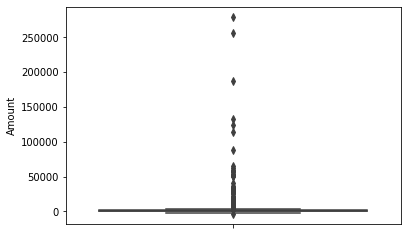

In [108]:
#outlier treatment
sns.boxplot('Amount',data=online_retail_df,orient='v')

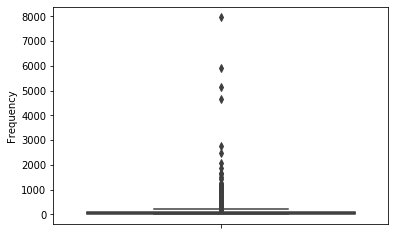

In [109]:
sns.boxplot('Frequency',data=online_retail_df,orient='v')

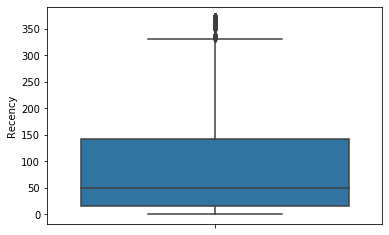

In [110]:
sns.boxplot('Recency',data=online_retail_df,orient='v')

In [111]:
rfm_df=online_retail_df[['Amount','Frequency','Recency']]

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scaler=StandardScaler()

In [114]:
scaler_rfm=scaler.fit_transform(rfm_df)

In [115]:
scaler_rfm=pd.DataFrame(scaler_rfm,columns=['Amount','Frequency','Recency'])

In [116]:
scaler_rfm.head()

,Amount,Frequency,Recency
0,-0.231001,-0.391720,2.322023
1,0.293432,0.382657,-0.893733
2,-0.012316,-0.266959,-0.169196
3,-0.017146,-0.086271,-0.725005
4,-0.190312,-0.327188,2.163220


## Hopkins Statistics

In [117]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]#columns #3
    n = len(X) # X.shape[0] rows #4372
    m = int(0.1 * n) #437
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)#437 unique samples from 4372 
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [118]:
hopkins(scaler_rfm)

0.9947920341684463

## Modelling

In [119]:
scaler_rfm.head()

,Amount,Frequency,Recency
0,-0.231001,-0.391720,2.322023
1,0.293432,0.382657,-0.893733
2,-0.012316,-0.266959,-0.169196
3,-0.017146,-0.086271,-0.725005
4,-0.190312,-0.327188,2.163220


In [120]:
# import KMeans
from sklearn.cluster import KMeans

In [121]:
kmeans=KMeans(n_clusters=4,max_iter=100)

In [122]:
kmeans.fit(scaler_rfm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [123]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0])

## Finding optimal clusters

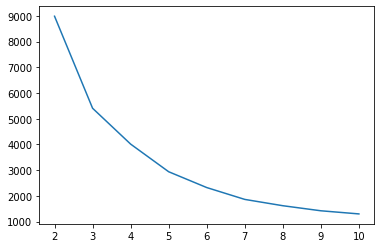

In [124]:
ssd=[]
range_clusters=[2,3,4,5,6,7,8,9,10]
for num_cluster in range_clusters:
    kmeans=KMeans(num_cluster,max_iter=100)
    kmeans.fit(scaler_rfm)
    ssd.append(kmeans.inertia_)
plt.plot(range_clusters,ssd)

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [125]:
from sklearn.metrics import silhouette_score

In [126]:
range_clusters=[2,3,4,5,6,7,8,9,10]
for num_cluster in range_clusters:
    kmeans=KMeans(num_cluster,max_iter=100)
    kmeans.fit(scaler_rfm)
    k=silhouette_score(scaler_rfm,kmeans.labels_)
    print("silhouette score {0} for {1} cluster/s".format(k,num_cluster))

silhouette score 0.9344641162235822 for 2 cluster/s
silhouette score 0.6003883114752382 for 3 cluster/s
silhouette score 0.5981422039499412 for 4 cluster/s
silhouette score 0.6149580516850672 for 5 cluster/s
silhouette score 0.5856955818362631 for 6 cluster/s
silhouette score 0.5240398378423919 for 7 cluster/s
silhouette score 0.5159440384364862 for 8 cluster/s
silhouette score 0.42196340896379375 for 9 cluster/s
silhouette score 0.42790116973795195 for 10 cluster/s


In [127]:
# we go with 3 for now
kmeans=KMeans(n_clusters=3,max_iter=100)
kmeans.fit(scaler_rfm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [128]:
kmeans.labels_

array([2, 0, 0, ..., 0, 0, 0])

In [129]:
online_retail_df['ClusterID']=kmeans.labels_

In [130]:
online_retail_df.head()

,CustomerID,Amount,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


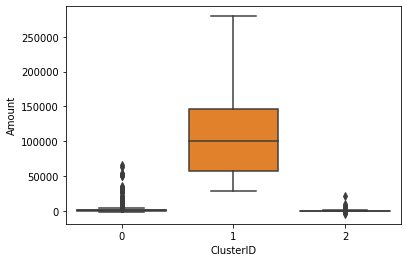

In [131]:
sns.boxplot('ClusterID','Amount',data=online_retail_df)

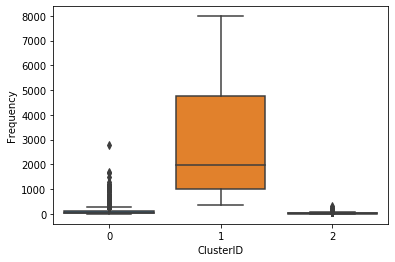

In [132]:
sns.boxplot('ClusterID','Frequency',data=online_retail_df)

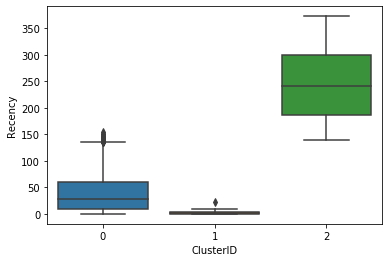

In [133]:
sns.boxplot('ClusterID','Recency',data=online_retail_df)

In [134]:
#removing outliers(statistical)

In [135]:
online_retail_df.shape

(4372, 5)

In [136]:
# removing (statistical) outliers
Q1 = online_retail_df.Amount.quantile(0.05)
Q3 = online_retail_df.Amount.quantile(0.95)
IQR = Q3 - Q1
online_retail_df=online_retail_df[(online_retail_df.Amount >= Q1 - 1.5*IQR) & (online_retail_df.Amount <= Q3 + 1.5*IQR)]
print(Q1,Q3,IQR,Q1 - 1.5*IQR,Q3+1.5*IQR)

101.13849999999985 5625.0039999999935 5523.8654999999935 -8184.659749999991 13910.802249999984


In [137]:
# outlier treatment for recency
Q1 = online_retail_df.Recency.quantile(0.05)
Q3 = online_retail_df.Recency.quantile(0.95)
IQR = Q3 - Q1
online_retail_df = online_retail_df[(online_retail_df.Recency >= Q1 - 1.5*IQR) & (online_retail_df.Recency <= Q3 + 1.5*IQR)]
print(Q1,Q3,IQR,Q1 - 1.5*IQR,Q3+1.5*IQR)

2.0 312.0 310.0 -463.0 777.0


In [138]:
# outlier treatment for frequency
Q1 = online_retail_df.Frequency.quantile(0.05)
Q3 = online_retail_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
online_retail_df = online_retail_df[(online_retail_df.Frequency >= Q1 - 1.5*IQR) & (online_retail_df.Frequency <= Q3 + 1.5*IQR)]
print(Q1,Q3,IQR,Q1 - 1.5*IQR,Q3+1.5*IQR)

4.0 298.39999999999964 294.39999999999964 -437.59999999999945 739.9999999999991


In [139]:
rfm_df=online_retail_df[['Amount','Frequency','Recency']]

In [140]:
scaler=StandardScaler()
scaler_rfm=scaler.fit_transform(rfm_df)
scaler_rfm=pd.DataFrame(scaler_rfm,columns=['Amount','Frequency','Recency'])

In [141]:
scaler_rfm.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [142]:
hopkins(scaler_rfm)

0.9520372405831723

In [143]:
kmeans=KMeans(n_clusters=3,max_iter=100)

In [144]:
kmeans.fit(scaler_rfm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [145]:
kmeans.labels_

array([0, 1, 2, ..., 0, 2, 2])

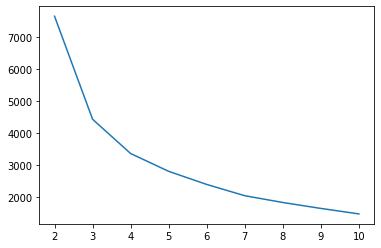

In [146]:
ssd=[]
range_clusters=[2,3,4,5,6,7,8,9,10]
for num_cluster in range_clusters:
    kmeans=KMeans(num_cluster,max_iter=100)
    kmeans.fit(scaler_rfm)
    ssd.append(kmeans.inertia_)
plt.plot(range_clusters,ssd)

In [147]:
range_clusters=[2,3,4,5,6,7,8,9,10]
for num_cluster in range_clusters:
    kmeans=KMeans(num_cluster,max_iter=100)
    kmeans.fit(scaler_rfm)
    k=silhouette_score(scaler_rfm,kmeans.labels_)
    print("silhouette score {0} for {1} cluster/s".format(k,num_cluster))

silhouette score 0.5415858652525395 for 2 cluster/s
silhouette score 0.5084896296141937 for 3 cluster/s
silhouette score 0.4816551560193964 for 4 cluster/s
silhouette score 0.4639907090076985 for 5 cluster/s
silhouette score 0.4171229822428261 for 6 cluster/s
silhouette score 0.4176350565197656 for 7 cluster/s
silhouette score 0.40946383070146597 for 8 cluster/s
silhouette score 0.41518638508918565 for 9 cluster/s
silhouette score 0.37914914393531696 for 10 cluster/s


In [148]:
kmeans=KMeans(n_clusters=3,max_iter=100)
kmeans.fit(scaler_rfm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [149]:
online_retail_df['ClusterID']=kmeans.labels_

In [150]:
online_retail_df.head()

,CustomerID,Amount,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


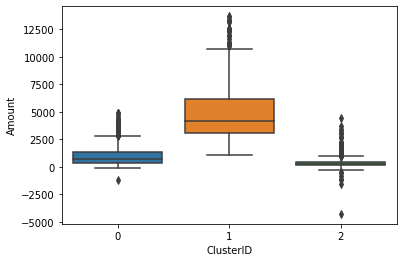

In [151]:
sns.boxplot('ClusterID','Amount',data=online_retail_df)

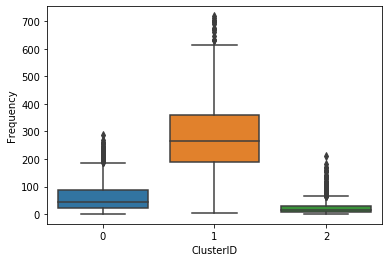

In [152]:
sns.boxplot('ClusterID','Frequency',data=online_retail_df)

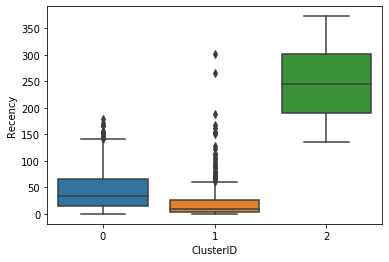

In [153]:
sns.boxplot('ClusterID','Recency',data=online_retail_df)

## Hierarchical Clustering

In [154]:
from scipy.cluster.hierarchy import dendrogram,linkage,cut_tree

In [155]:
scaler_rfm.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [156]:
online_retail_df.head()

,CustomerID,Amount,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


In [157]:
#single linkage
mergings=linkage(scaler_rfm,method='single')

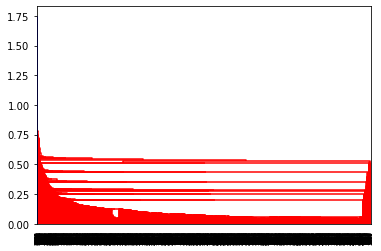

In [158]:
dendrogram(mergings)
plt.show()

In [159]:
#complete linakage
mergings=linkage(scaler_rfm,method='complete')

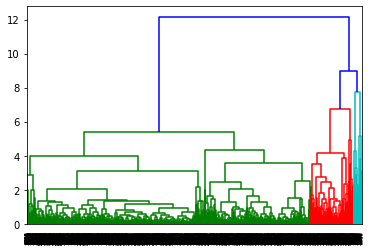

In [160]:
dendrogram(mergings)
plt.show()

In [92]:
cluster_labels=cut_tree(mergings,n_clusters=5)

In [93]:
cluster_labels.shape

(4293, 1)

In [94]:
cluster_labels=cluster_labels.reshape(-1,)

In [95]:
online_retail_df['Cluser_labels']=cluster_labels

In [96]:
online_retail_df.head()

,CustomerID,Amount,Frequency,Recency,ClusterID,Cluser_labels
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,0,1
2,12348.0,1797.24,31,74,1,0
3,12349.0,1757.55,73,18,1,0
4,12350.0,334.40,17,309,2,0


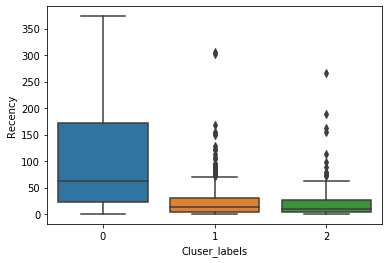

In [97]:
sns.boxplot('Cluser_labels','Recency',data=online_retail_df)

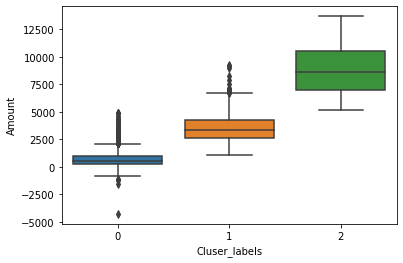

In [98]:
sns.boxplot('Cluser_labels','Amount',data=online_retail_df)

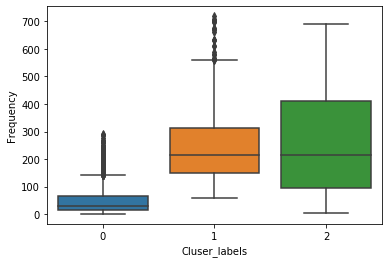

In [99]:
sns.boxplot('Cluser_labels','Frequency',data=online_retail_df)

In [100]:
#average linakage
mergings=linkage(scaler_rfm,method='average')

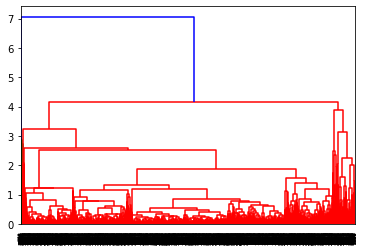

In [101]:
dendrogram(mergings)
plt.show()